In [9]:
import pandas as pd

In [50]:
df = pd.read_html('https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=spec&dom_lg=1&spec_comps=10&player_id1=39944392&p1yrfrom=2023-2024&player_id2=68c720b5&p2yrfrom=2023-2024&player_id3=d3d49142&p3yrfrom=2023-2024&player_id4=df04eb4b&p4yrfrom=2023-2024&player_id5=45963054&p5yrfrom=2023-2024&player_id6=1c9cfad4&p6yrfrom=2023-2024&player_id7=91cd37b7&p7yrfrom=2023-2024',
                   attrs={"id":"standard_stats"})[0]

In [51]:
pd.set_option('display.max_rows', None)

In [52]:
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Player               Span             Nation   
0        Sammie Szmodics            2023-24             ie IRL   
1         Adam Armstrong            2023-24            eng ENG   
2       Morgan Whittaker            2023-24            eng ENG   
3  Crysencio Summerville            2023-24             nl NED   
4            Jamie Vardy            2023-24            eng ENG   
5    Emmanuel Latte Lath            2023-24             ci CIV   

  Unnamed: 3_level_0 Unnamed: 4_level_0 Playing Time                     \
                 Pos              Squad           MP Starts   Min   90s   
0              MF,FW          Blackburn           44     44  3899  43.3   
1              FW,MF        Southampton           46     44  3745  41.6   
2              FW,MF    Plymouth Argyle           46     45  3972  44.1   
3                 FW       Leeds United           43     41  3498  38.9   
4                 FW     Leicester City           35     18  1768  19.6   
5                 FW      Middlesbrough           30     23  2091  23.2   

  Performance  ... Per 90 Minutes                                              \
          Gls  ...            Gls   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG   
0          27  ...           0.62  0.09  0.72  0.62   0.72  0.51  0.12   0.64   
1          21  ...           0.50  0.31  0.82  0.41   0.72  0.53  0.19   0.72   
2          19  ...           0.43  0.18  0.61  0.43   0.61  0.25  0.15   0.40   
3          19  ...           0.49  0.23  0.72  0.39   0.62  0.42  0.30   0.72   
4          18  ...           0.92  0.10  1.02  0.71   0.81  0.87  0.12   0.99   
5          16  ...           0.69  0.04  0.73  0.69   0.73  0.50  0.07   0.57   

                  
   npxG npxG+xAG  
0  0.50     0.62  
1  0.45     0.64  
2  0.25     0.40  
3  0.32     0.62  
4  0.67     0.79  
5  0.50     0.57  

[6 rows x 34 columns]

In [53]:
import matplotlib.pyplot as plt


In [54]:
df.columns = df.columns.droplevel(level=0)


In [80]:
df

,Player,Gls,Ast
0,Sammie Szmodics,27,4
1,Adam Armstrong,21,13
2,Morgan Whittaker,19,8
3,Crysencio Summerville,19,9
4,Jamie Vardy,18,2
5,Emmanuel Latte Lath,16,1


In [78]:
Player = df.iloc[:, 0]  
Goals = df.iloc[:, 9]   
Assist = df.iloc[:, 10] 

data = {
    'Player': Player,
    'Gls': Goals,
    'Ast': Assist
}

df = pd.DataFrame(data)

In [79]:
df

,Player,Gls,Ast
0,Sammie Szmodics,27,4
1,Adam Armstrong,21,13
2,Morgan Whittaker,19,8
3,Crysencio Summerville,19,9
4,Jamie Vardy,18,2
5,Emmanuel Latte Lath,16,1


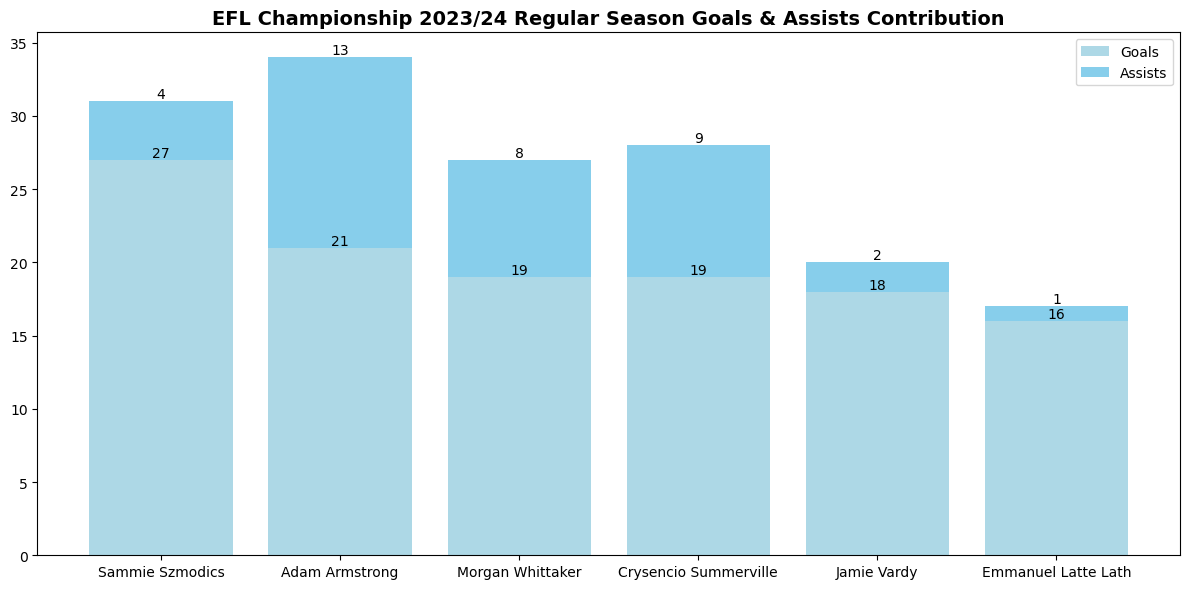

In [120]:
df_sorted = df.sort_values(by='Gls', ascending=False)

categories = df_sorted['Player']  
Goals = df_sorted['Gls']  
Assist = df_sorted['Ast']

plt.figure(figsize=(12, 6))
plt.bar(Player, Goals, color='lightblue', label='Goals')
plt.bar(Player, Assist, bottom=Goals, color='skyblue', label='Assists')

for i, val in enumerate(Goals):
    plt.text(i, Goals[i] + 0.2, str(val), ha='center')
    
for i, val in enumerate(Assist):
    plt.text(i, Goals[i] + Assist[i] + 0.2, str(val), ha='center')
    
plt.title('EFL Championship 2023/24 Regular Season Goals & Assists Contribution', fontsize=14, fontweight='bold')

plt.legend()

plt.tight_layout()
    
plt.show()